In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 


warnings.filterwarnings("ignore") 


#To directly add headers while reading the CSV File 
#https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
haber = pd.read_csv(r'C:\Users\trash\Downloads\haberman.csv',names =["Age","op_year(1900)","axil_nodes","surv_chance"])
haber

haber["surv_chance"].replace([1,2],["Survived","Not Survived"],inplace=True)

print(haber)
print(print(haber["surv_chance"].value_counts()))
print(haber.shape)


     Age  op_year(1900)  axil_nodes   surv_chance
0     30             64           1      Survived
1     30             62           3      Survived
2     30             65           0      Survived
3     31             59           2      Survived
4     31             65           4      Survived
..   ...            ...         ...           ...
301   75             62           1      Survived
302   76             67           0      Survived
303   77             65           3      Survived
304   78             65           1  Not Survived
305   83             58           2  Not Survived

[306 rows x 4 columns]
Survived        225
Not Survived     81
Name: surv_chance, dtype: int64
None
(306, 4)


OBSERVATIONS
1. There are total 3 features/independent variables - Age, Operation_Year(1900-), Axiliary Nodes done
2. There is only 1 class/label/dependent variable - surv_chance
3. This is an unbalanced Data set having 306 Data Points/Rows and total of 4 Columns
4. There is 255 Data Points for 1st Class i.e "Survived" and 81 Data Points for 2nd Class i.e "Not Survived"

OBJECTIVE
1. Distinguish clearly when a patient comes for diagnosis then he/she should Survive or Not according to the factors like Age,operation year and axiliary nodes

In [86]:
'''Age of patient at time of operation (numerical)
   Patient's year of operation (year - 1900, numerical) 
   Number of positive axillary nodes detected (numerical)
   Survival status (class attribute)
      1 = the patient survived 5 years or longer
      2 = the patient died within 5 year
'''
haber["axil_nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axil_nodes, dtype: int64

In [87]:
haber_surv = haber[haber["surv_chance"]== "Survived"]
haber_not_surv = haber[haber["surv_chance"]=="Not Survived"]

print(np.mean(haber_not_surv),"\n")
print(np.mean(haber_surv))

Age              53.679012
op_year(1900)    62.827160
axil_nodes        7.456790
dtype: float64 

Age              52.017778
op_year(1900)    62.862222
axil_nodes        2.791111
dtype: float64


# Bi-Variate Analysis 

## Scatter Plot

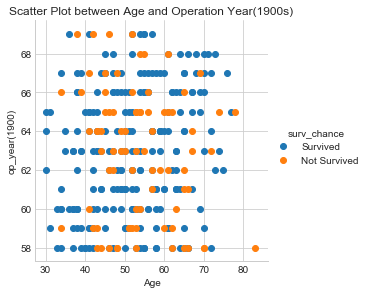

In [90]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="surv_chance", size=4) \
   .map(plt.scatter, "Age", "op_year(1900)") \
   .add_legend();
plt.title("Scatter Plot between Age and Operation Year(1900s)")
plt.show();

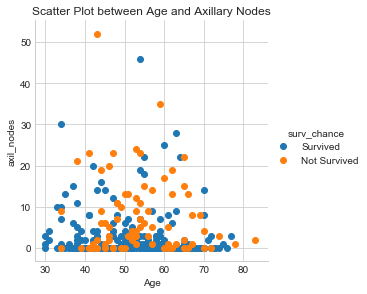

In [91]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="surv_chance", size=4) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.title("Scatter Plot between Age and Axillary Nodes")
plt.show();

OBSERVATIONS
1. This is a mixed dataset so direct segregation of resultant is not possible

## Pair Plot 

              Age  op_year(1900)  axil_nodes
count  306.000000     306.000000  306.000000
mean    52.457516      62.852941    4.026144
std     10.803452       3.249405    7.189654
min     30.000000      58.000000    0.000000
25%     44.000000      60.000000    0.000000
50%     52.000000      63.000000    1.000000
75%     60.750000      65.750000    4.000000
max     83.000000      69.000000   52.000000


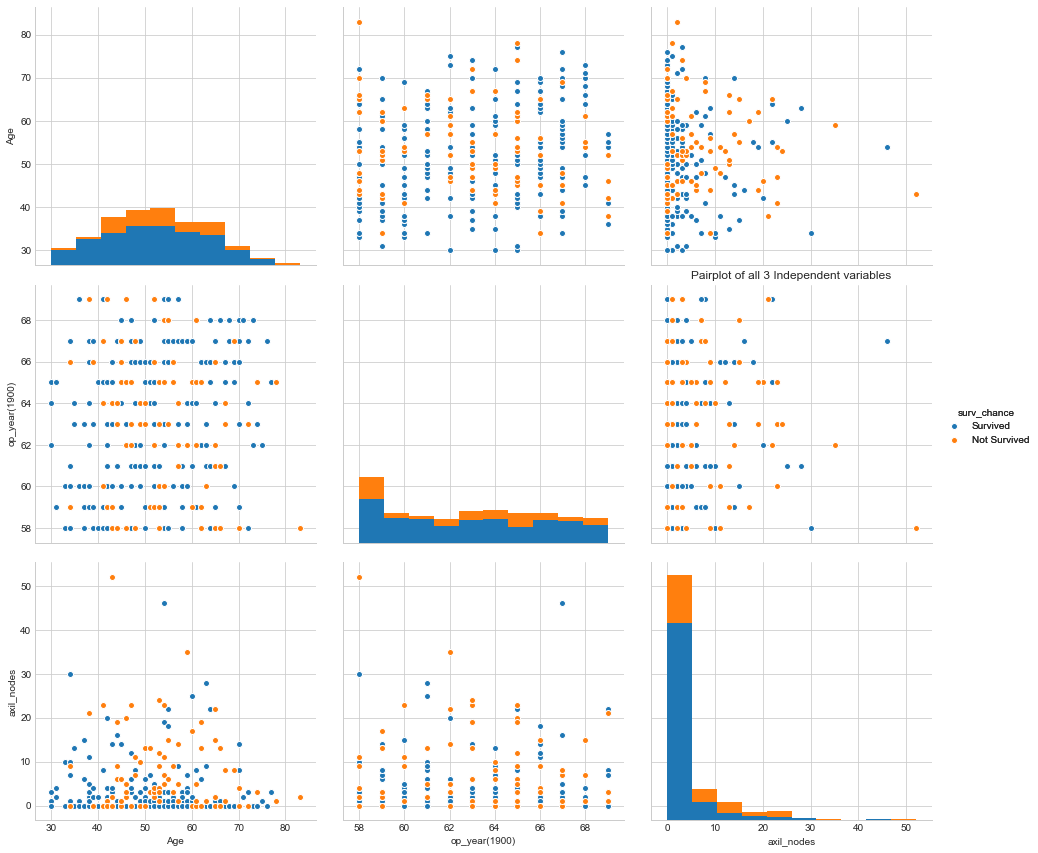

In [144]:
print(haber.describe())
#sns.boxplot(x="Age",y="Op_year(1900)",data = haber)
#plt.scatter(x="Age",y="Op_year(1900)",data=haber)
#plt.legend()
sns.pairplot(haber, hue ="surv_chance",size = 4)\
   .add_legend()
plt.title("Pairplot of all 3 Independent variables")
plt.show()

OBSERVATIONS
1. This pairplot shows us that survived and those who did not survived are of any Age, Axil Nodes and any operation year
2. Its difficult to distinguish between Survived and not survived by looking into any pair of plot.
3. Scatter or pairplots are almost impossible to get any observation regarding this data.
4. As from observation of 75 percentile and max values there are extreme Outliers in "Axil_Nodes" Column only.

# Uni-Variate Analysis 

## Distplot

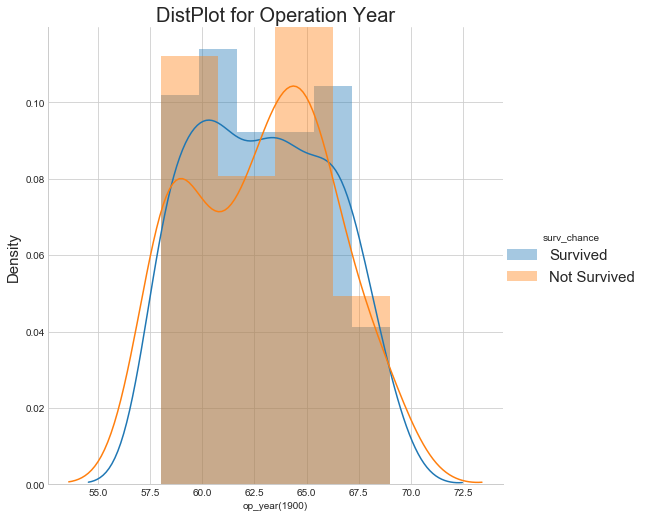

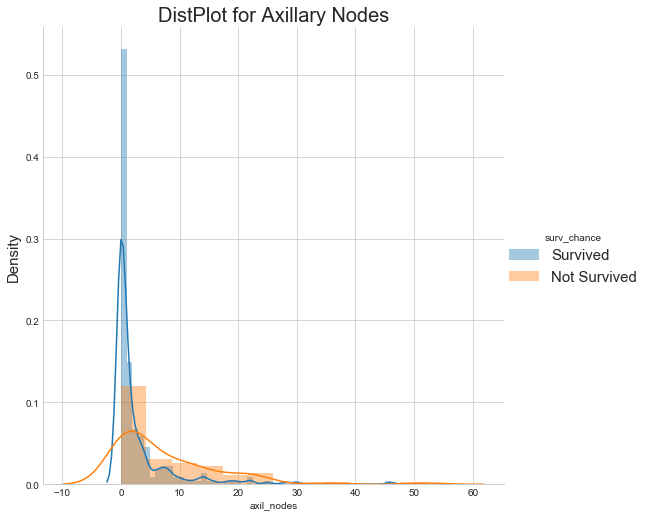

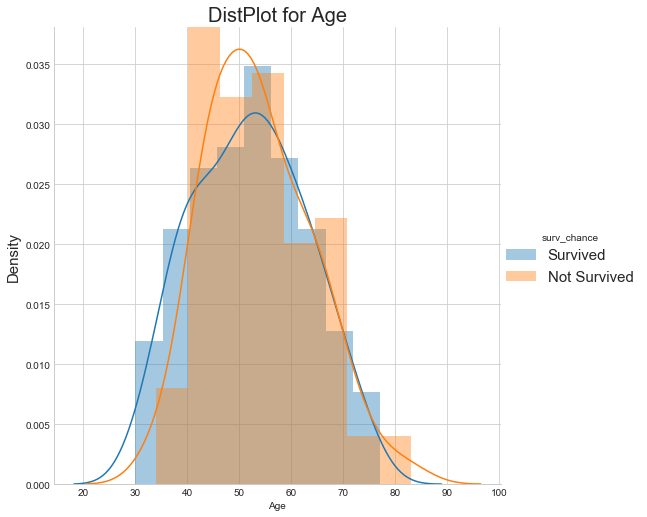

In [141]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="surv_chance", size=7)\
   .map(sns.distplot, "op_year(1900)") \
   .add_legend(fontsize=15);
plt.ylabel("Density",fontsize = 15)
plt.title("DistPlot for Operation Year",fontsize = 20)

sns.FacetGrid(haber, hue="surv_chance", size=7) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend(fontsize=15);
plt.ylabel("Density",fontsize = 15)
plt.title("DistPlot for Axillary Nodes",fontsize = 20)

sns.FacetGrid(haber,hue="surv_chance",size = 7)\
   .map(sns.distplot,"Age")\
   .add_legend(fontsize=15);
plt.ylabel("Density",fontsize = 15)
plt.title("DistPlot for Age",fontsize = 20)

plt.show();

OBSERVATIONS
1. The PDF of "axil_nodes" is the best possible pdf in comparison to "Age" and "op_year(1900)" but still finding Mean and Standard Deviation is very difficult as many points overlap.

## CDF and PDF 

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


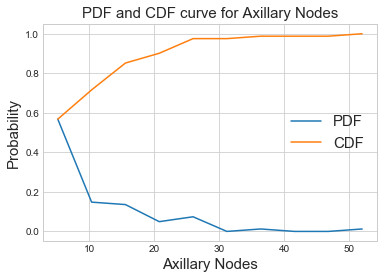

In [122]:
counts, bin_edges = np.histogram(haber_not_surv['axil_nodes'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.legend(["PDF","CDF"],fontsize = 15)
plt.title("PDF and CDF curve for Axillary Nodes",fontsize = 15)
plt.xlabel("Axillary Nodes",fontsize = 15)
plt.ylabel("Probability",fontsize = 15)




plt.show();

OBSERVATION
1. CDF states that 80% people have axiliary nodes approximately ~ 14
2. PDF starts from 0.56790123 and goes upto 0.01234568
3. CDF starts from 0.56790123 and goes upto 1

[0.01333333 0.00888889 0.         0.00888889 0.02222222 0.00888889
 0.00888889 0.02666667 0.04       0.02222222 0.01333333 0.03111111
 0.03111111 0.03111111 0.01777778 0.02666667 0.         0.01333333
 0.03555556 0.01777778 0.03555556 0.04444444 0.01777778 0.04444444
 0.02222222 0.04       0.03555556 0.02222222 0.03555556 0.03111111
 0.03111111 0.01777778 0.02666667 0.         0.01777778 0.03111111
 0.02222222 0.02666667 0.01333333 0.01777778 0.00888889 0.01333333
 0.02222222 0.00444444 0.01333333 0.00888889 0.00444444 0.00444444
 0.00444444 0.00444444]
[30.   30.94 31.88 32.82 33.76 34.7  35.64 36.58 37.52 38.46 39.4  40.34
 41.28 42.22 43.16 44.1  45.04 45.98 46.92 47.86 48.8  49.74 50.68 51.62
 52.56 53.5  54.44 55.38 56.32 57.26 58.2  59.14 60.08 61.02 61.96 62.9
 63.84 64.78 65.72 66.66 67.6  68.54 69.48 70.42 71.36 72.3  73.24 74.18
 75.12 76.06 77.  ] 

[0.02469136 0.         0.         0.         0.01234568 0.01234568
 0.         0.03703704 0.02469136 0.04938272 0.03703704 0.03

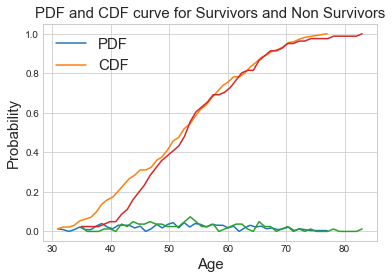

In [129]:
counts, bin_edges = np.histogram(haber_surv['Age'], bins=50, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges,"\n");

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.legend(["PDF","CDF"])
plt.xlabel("Age")
plt.ylabel("Probability")

counts, bin_edges = np.histogram(haber_not_surv['Age'], bins=50, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges,"\n");
print("**************************************************************************************")
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.legend(["PDF","CDF"],fontsize = 15)
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Probability",fontsize = 15)
plt.title("PDF and CDF curve for Survivors and Non Survivors",fontsize = 15)



plt.show();



OBSERVATIONS
1. Taking 50 bins and and plotting PDF and CDF of Survivor and Non Survivor for the Age as on x-axis and probability on y-axis
2. PDF starts from 0.01333333,0.02469136 for 1st observation(Age - 30 and Age - 34) for Survivor and Non Survivor Respectively.
3. If a person having Age between 34 to 77 then the probability he/she can survive or not is uncertain.

In [25]:
np.percentile(haber_surv["op_year(1900)"],90)

67.0

## Boxplot 

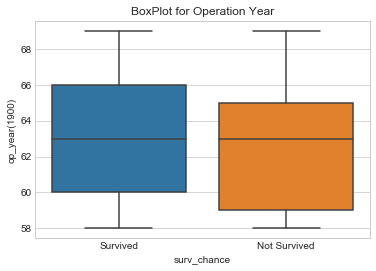

In [151]:
sns.boxplot(x="surv_chance",y="op_year(1900)",data=haber)
plt.title("BoxPlot for Operation Year")
plt.show()

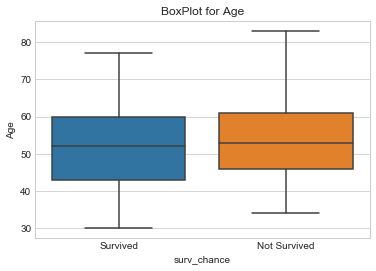

In [152]:
sns.boxplot(x="surv_chance",y="Age",data=haber)
plt.title("BoxPlot for Age")
plt.show()

OBSERVATION
1. Univariate Analysis is not effective as we can see 25%,50% and 75% points are overlapping

## Voilin Plot 

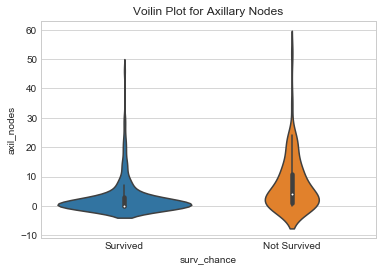

In [156]:
sns.violinplot(x="surv_chance",y="axil_nodes",data=haber,size = 19)
plt.title("Voilin Plot for Axillary Nodes")
plt.show()

OBSERVATIONS
1. PDF of "Survived" follows almost a Gaussian Distribution but with small right skewness and maximum data points are concentrated below "axil_nodes" < 8
2. PDF of "Not Survived" follows almost a Gaussian Distribution but with large right skewness and maximum data points are concentrated below "axil_nodes" < 11

In [177]:
myhaber.corr()

,Age,op_year(1900),axil_nodes
Age,1.000000,0.089529,-0.063176
op_year(1900),0.089529,1.000000,-0.003764
axil_nodes,-0.063176,-0.003764,1.000000


OBSERVATIONS
1. It is clear that the maximum correlation we get is between "Age" and "op_year(1900)" that is near about 8-9%.
2. Other variables are far apart from each other or have negative correlation i.e when 1st variable increases the other one decreases.

## Joint Plot

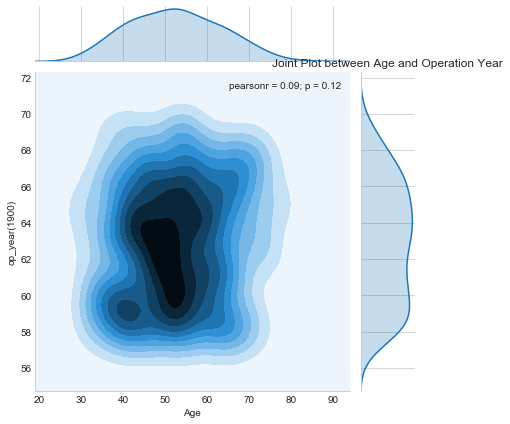

In [161]:
sns.jointplot(data=haber,x='Age',y='op_year(1900)',kind = 'kde')
plt.title("Joint Plot between Age and Operation Year")
plt.show()

OBSERVATIONS
1. This is the best graph of correlation between independent variables with Pearson Correlation Coefficient ~ 0.09
2. We can say majority of the Age affected is between 40 and 60 and the operation year 1958 to 1966.